In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor # 회귀 알고리즘
from sklearn.model_selection import train_test_split # 훈련 테이터와 테스트 데이터 분리
from sklearn.metrics import mean_absolute_error # 모델을 평가하는 지표 (평균절대오차)

# 생선 길이로 무게 예측

- 회귀(regression)
    - 임의의 어떤 숫자를 예측하는 문제
    - 변수들 사이의 상관관계를 분석하는 방법
    
- KNN회귀
    1. 분류와 똑같의 예측하려는 샘플에 가장 가까운 샘플 k개를 선택 (기본 k = 5)
    2. k개의 샘플의 종속변수 값의 평균을 구함

# 데이터 준비

In [3]:
df = pd.read_csv("./data/FISH.csv")

In [4]:
# 농어 데이터만 사용
df = df.loc[df["Species"] == "Perch", ["Species", "Length2", "Weight"]]

In [5]:
df.head()

,Species,Length2,Weight
72,Perch,8.4,5.9
73,Perch,13.7,32.0
74,Perch,15.0,40.0
75,Perch,16.2,51.5
76,Perch,17.4,70.0


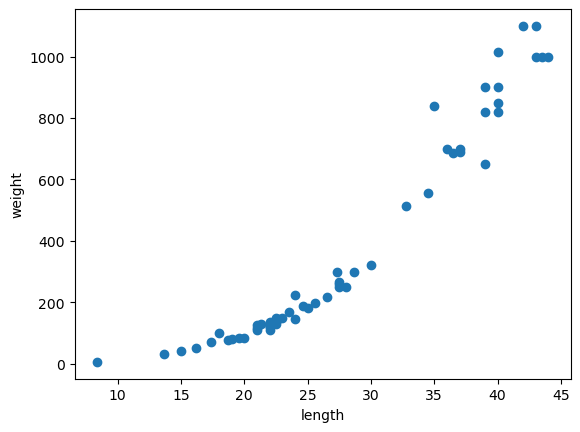

In [6]:
plt.figure()

plt.scatter(df["Length2"], df["Weight"])
plt.xlabel("length")
plt.ylabel("weight")
plt.show()

- 길이가 커짐에 따라 무게가 점점 증가하는 경향이 있음

In [7]:
x_train, x_test, y_train, y_test = train_test_split(df["Length2"], df["Weight"], test_size = 0.25, random_state = 4)

In [11]:
# 독립변수는 2차원 배열이어야 함
x_train.values

array([32.8, 24.6, 22. , 22. , 23. , 27.5, 22. , 26.5, 22. , 36. , 25. ,
       27.5, 43. , 21.3, 21. , 22.5, 28. , 40. , 42. , 39. , 40. , 44. ,
       15. , 40. , 40. , 22.7,  8.4, 16.2, 37. , 34.5, 30. , 43. , 27.3,
       39. , 35. , 20. , 19.6, 23.5, 36.5, 13.7, 18. , 39. ])

In [13]:
x_train = np.reshape(x_train.values, (-1, 1))

In [15]:
x_test = np.reshape(x_test.values, (-1, 1))

# 모델 훈련

In [17]:
knr = KNeighborsRegressor()

In [18]:
knr.fit(x_train, y_train)

KNeighborsRegressor()

# 모델 평가

- 결정계수
    - 계산식
        - 1 - ((sum(타깃 - 예측)^2)) / (sum((타깃 - 타깃평균)^2)))
    - 모델의 설명력을 뜻함
    - 1에 가까울수록 모델 성능이 좋음

In [20]:
knr.score(x_test, y_test)

0.9916188730818064

- mean_absolute_error
    - 타깃과 예측값의 절댓값 오차를 평균하여 반환

In [21]:
# 테스트 세트에 대한 예측
pred = knr.predict(x_test)

In [23]:
pred

array([  72.3,  138. , 1010. ,  166.6,  125. ,  227.2,  276. ,  255.6,
         86.3,  727. ,  102. ,  166.6,  125. ,  125. ])

In [25]:
# 테스트 세트에 대한 평균 절댓값 오차를 계산
mae = mean_absolute_error(y_test, pred)

In [26]:
mae

17.871428571428574

In [27]:
pred_df = pd.DataFrame({"ans" : y_test, "pred" : pred})

In [28]:
pred_df

,ans,pred
76,70.0,72.3
92,150.0,138.0
126,1000.0,1010.0
96,225.0,166.6
84,125.0,125.0
100,197.0,227.2
107,300.0,276.0
104,265.0,255.6
78,78.0,86.3
115,690.0,727.0


<img src = "./img/KNN_VS_LINEAR.png">

In [29]:
max(x_train)

array([44.])

In [30]:
knr.predict([[50]])

array([1010.])

In [31]:
knr.predict([[60]])

array([1010.])

In [32]:
knr.predict([[70]])

array([1010.])

In [33]:
max(y_train)

1100.0

In [34]:
# 50cm 농어의 이웃 찾기
dist, idx = knr.kneighbors([[50]])

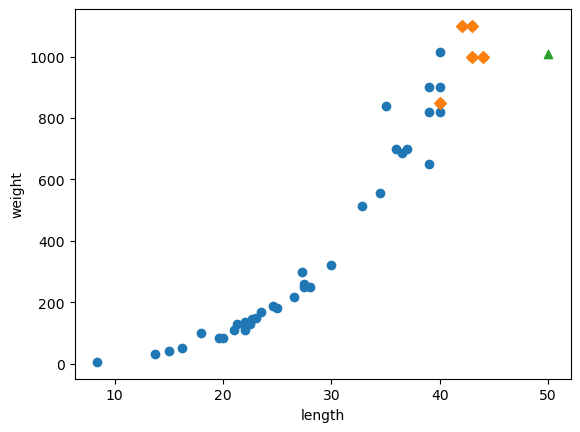

In [38]:
# 산점도 그리기

plt.figure()

plt.scatter(x_train, y_train)
plt.scatter(x_train[idx], y_train.iloc[idx.flatten()], marker = "D")
plt.scatter(50, 1010, marker = "^")
plt.xlabel("length")
plt.ylabel("weight")
plt.show()